# EDA. Dataset: 'Fraudulent Transactions Data' from Kaggle

https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/Fraud.csv')
print(f'rows: {len(df)}')
df.head()

rows: 6362620


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [70]:
merchants = len(df[df['nameDest'].str.startswith('M')]) * 100 / len(df)
print(f'Merchant transactions: {len(df[df["nameDest"].str.startswith("M")]) } ({round(merchants, 2)}%)')

Merchant transactions: 2151495 (33.81%)


## Category of the data
Fraudulent transactions data for a financial company. Data is available in CSV format having 6362620 rows and 10 columns.
Dataset doesn't contain missing values.

In [39]:
missing_values = df.isna().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### 'step'

Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation). 

Plot below shows frequency of each step in the dataset.

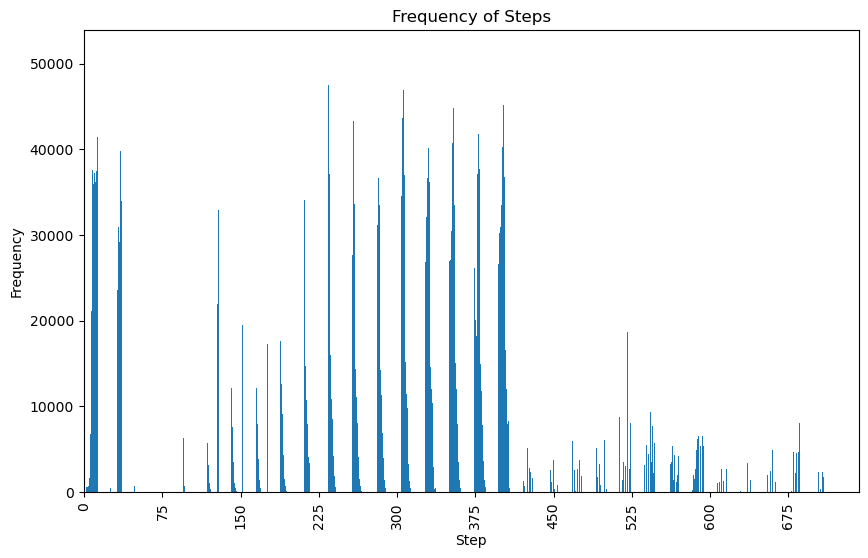

In [ ]:
# df.step

step_values = df.step.value_counts().sort_index()
step_values.plot(kind='bar', figsize=(10, 6))
plt.title("Frequency of Steps")
plt.xlabel("Step")
plt.ylabel("Frequency")
plt.xticks(ticks=range(0, 745, 75), labels=range(0, 745, 75), rotation=90)
plt.show()

### 'type'

CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

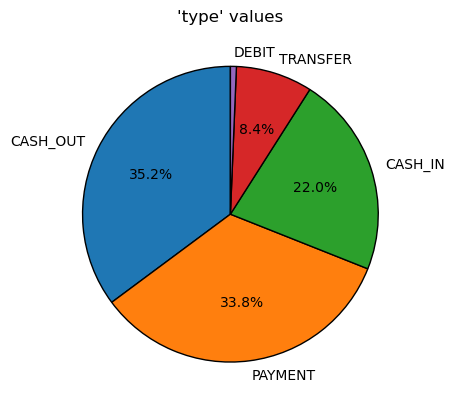

In [ ]:
# df.type

type_values = df.type.value_counts()

plt.pie(
    type_values.values,
    labels=type_values.index,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("'type' values")
plt.show()

### 'amount'

Amount of the transaction in local currency

In [49]:
# df.amount

# CASH_OUT transaction with amount 0. All of them a fraud
df[df['amount'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


### 'isFraud'

In [57]:
# df.isFraud

isFraud = df.isFraud
fraud = isFraud[isFraud == 1]
print(f'Fraud amount: {len(fraud)} ({len(fraud)/len(df.isFraud)*100:.2}%)')


Fraud amount: 8213 (0.13%)
